In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("imported!")

imported!


## Improving the Model

first prediction -> Baseline prediction
first model -> Baseline Model

Now improve: what do you think?

**From a Data perspective**
* collecting more data? (more the data, the better the results)
* Could we improve our data?

**From Model perspective**
* Using a complex algorithm (using ensemble classifier rather than linear svc).
* Could we improve a current model?

NOTE- What is hyperparameter?
* Parameters -  Models finds the pattern in data on its own
* Hyperparameters - Settings on the model you can adjust to (potentially improve its abiltity to find patterns).
  

In [2]:
# lets have a look at parameters of the model.

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Three ways to adjust hyperparameters

1. Manually
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

#### Tuning Hyperparameters Manually

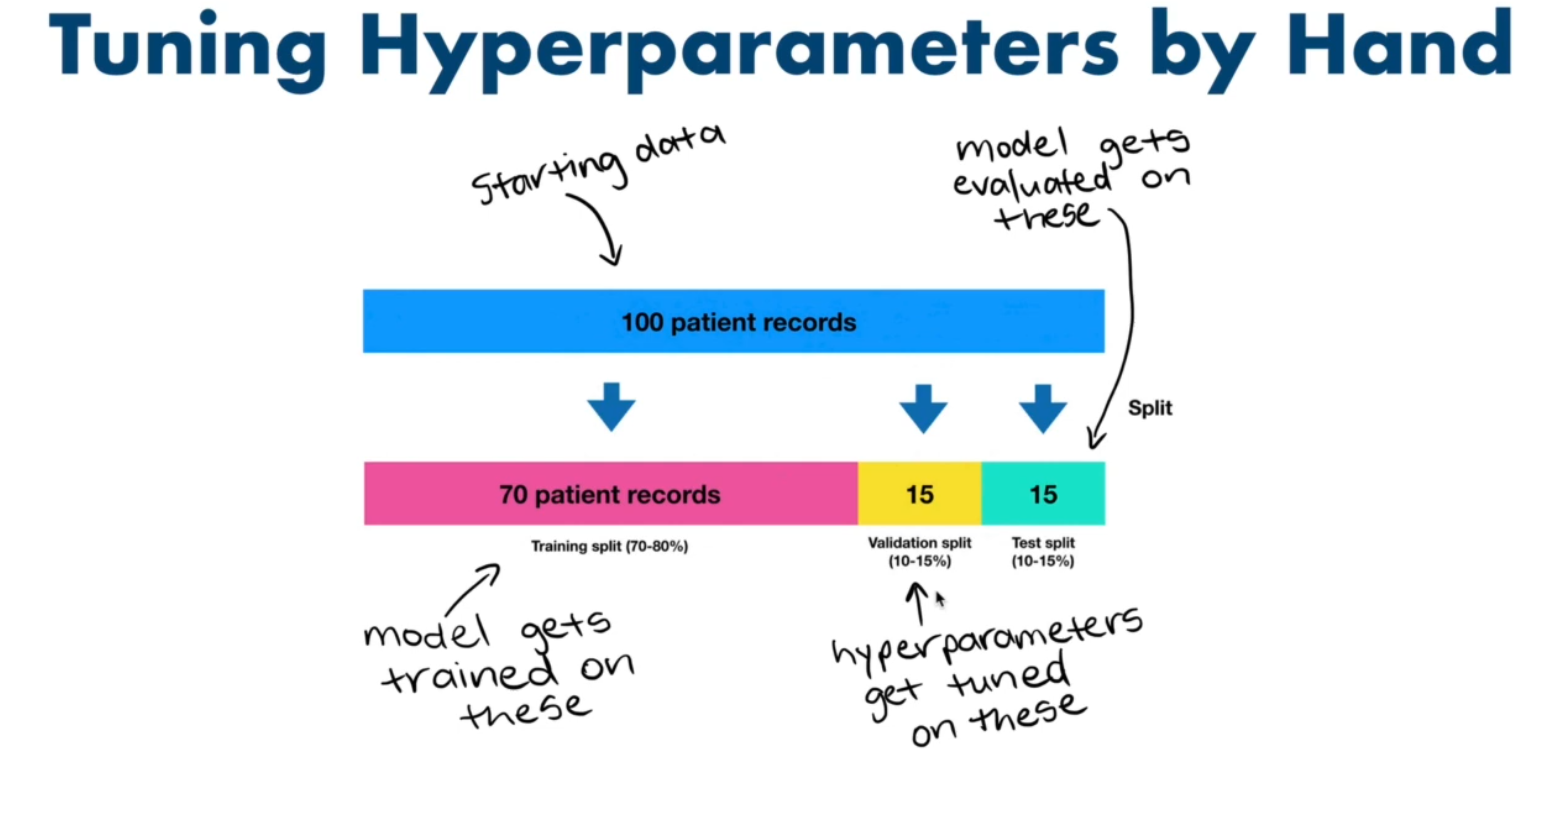

-----------------------------------------------------------------------------------------------------------------------

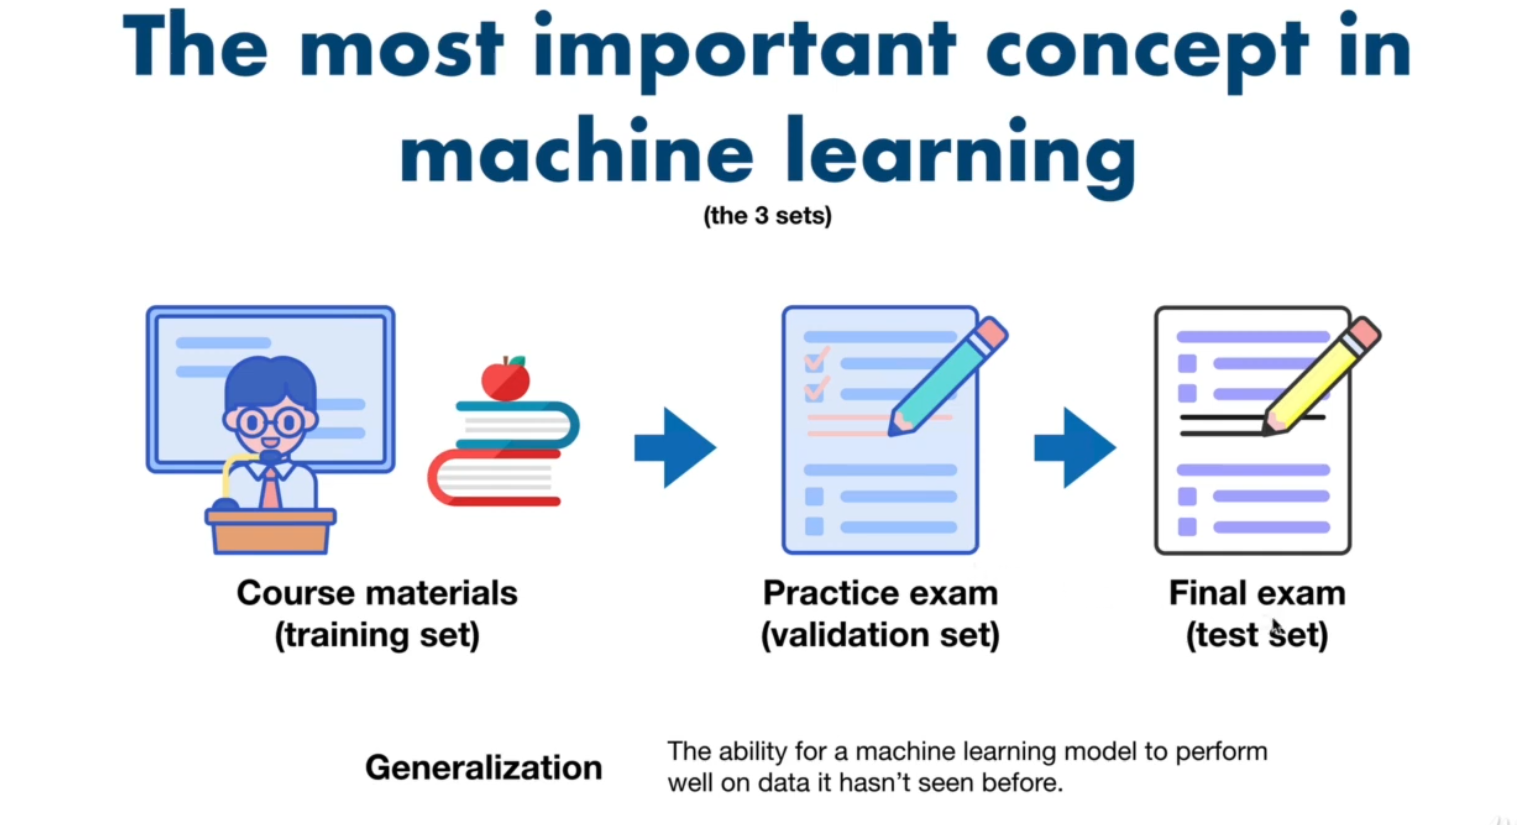

----------------------------------------------------------

In [3]:
file = pd.read_csv("../datasets/heart.csv")
file.head(10)

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# verttical split
np.random.seed(3)

x = file.drop("target",axis=1)
y = file["target"]

# horizontal

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

model.fit(x_train,y_train)

RandomForestClassifier()

In [5]:
print(f"The Model [Random forest classifier] has accuracy: {model.score(x_test,y_test)*100:.2f}%")

The Model [Random forest classifier] has accuracy: 83.61%


We are trying to adjust:

1. `max_depth`
2. `max_features`
3. `min_samples_leaf`
4. `min_samples_split`
5. `n_estimators`

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_preds = model.predict(x_test)

In [7]:
# a function to evaluate the model

def evaluate_preds(y_test,y_preds):
    """
    function to print the comparison between many evaluation technique.
    """
    accuracy = accuracy_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    precision = precision_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)
    metrics_dict  = {"accuracy": round(accuracy,2),
                    "recall": round(recall,2),
                    "precision":round(precision,2),
                    "F1":round(f1,2)}
    
    
    return metrics_dict


In [8]:
evaluate_preds(y_test,y_preds)

{'accuracy': 0.84, 'recall': 0.88, 'precision': 0.88, 'F1': 0.88}

Now for improving the machine learning model we need one one split in the data apart from training and testing set and `train_test_split` will not give us validation set, so taking out the validation set manually.

In [9]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(3)

# shuffle the data to make a fair prediction
file_s = file.sample(frac=1)

file_s


,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0


In [10]:
# splitting the data into x and y
np.random.seed(3)
x = file_s.drop("target",axis = 1)
y = file_s["target"]

# horizontal split

train_data = round(0.7*len(file_s)) # 70 % percent of the data
valid_data = round(train_data+0.15*len(file_s)) # 15% of data
x_train,y_train = x[:train_data],y[:train_data]
x_valid,y_valid = x[train_data:valid_data],y[train_data:valid_data]
x_test,y_test = x[valid_data:],y[valid_data:]

# checking some facts
print((len(x_train)+len(x_valid)+len(x_test))==len(x))
print((len(y_train)+len(y_valid)+len(y_test))==len(x))


True
True


In [11]:
model =RandomForestClassifier()

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# making baseline prediction

model.fit(x_train,y_train)
y_preds = model.predict(x_valid)


In [13]:
evaluate_preds(y_valid,y_preds)

{'accuracy': 0.73, 'recall': 0.83, 'precision': 0.7, 'F1': 0.76}

-----------------------------------------------------------------------------------

## By changing the `n_estimators`

In [14]:
model2 = RandomForestClassifier(n_estimators=10)
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [15]:
y_preds_2 = model2.predict(x_valid)

In [16]:
evaluate_preds(y_preds_2,y_valid)

{'accuracy': 0.73, 'recall': 0.7, 'precision': 0.83, 'F1': 0.76}

In [17]:
model2.score(x_test,y_test)

0.6739130434782609

In [18]:
model.score(x_test,y_test) #better

0.717391304347826

-----------------------------

## Changing `max_depth`

In [19]:
model3 = RandomForestClassifier(n_estimators=100,max_depth=10)
model3.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [20]:
model3.score(x_test,y_test) #got more better results

0.7608695652173914

In [21]:
# check using validation dataset

y_preds3 = model3.predict(x_valid)

evaluate_preds(y_preds3,y_valid)

{'accuracy': 0.76, 'recall': 0.71, 'precision': 0.87, 'F1': 0.78}

## Tuning Hyperparamter using randomizesearchcv

The issue with manual tuning of the hyper parameters is that the manual work needs a lot of time to get a perfect values of each parameter to get the best out of the model. this is like trial and error checking if any delta change in current parameters will work better or not. so we use RandomSearchCV to randomize the parameters to get a better out of some selected params.


In [22]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_dict = {"n_estimators":[10,100,200,500,1000,1200],
                  "max_depth":[None,5,10,20,30],
                  "max_features":["auto","sqrt"],
                  "min_samples_split":[2,4,6],
                  "min_samples_leaf":[1,2,4]}
np.random.seed(3)

x = file_s.drop("target",axis =1)
y = file_s["target"]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate RandomForesClassifier

model = RandomForestClassifier(n_jobs=1) # how much of your machine processor you want to dedicate it to this model training -1 means complete

# setup randomize Search Cv
ransom_model = RandomizedSearchCV(estimator=model,param_distributions=hyperparam_dict,n_iter=10,cv=5,verbose=2)

# what is happening here!!!


#### WELL WHAT IS THIS DOING?!

basically, `RandomizedSearchCV` is a cross-validation technique that selects the hyperparameter randomly from the param_distributions = `hyperparam_dict` and assigns it to the model, and trains the model for `n_iter` using `n_estimators` and `estimator` = `model`, the `cv = 5` is basically dividing the dataset into n different folds so, total training is `n_iters`*`cv` here 50. and `verbose` gives us the output in the ouput cell below. just train the model using `ransom_model.fit(x_train,y_train)` and get the output.

In [23]:
ransom_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_es

D:\languages\python\machine_learning\Notes\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\languages\python\machine_learning\Notes\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\languages\python\machine_learning\Notes\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\languages\python\machine_learning\Notes\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [24]:
ransom_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [25]:
# these are the best paramters whih will give us a better result than model2.score and model.score
ransom_model.score(x_test,y_test)

0.8360655737704918

In [26]:
model2.score(x_valid,y_valid)

0.7333333333333333

#### see the difference

------------------------------------

## hyperparameter training using grid Search CV


In [27]:
hyperparam_dict

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

here we can see that if  we consider taking all the parameters one by one to the permutaion will get a total of 6*5*3*2*2 and  * 5 for cv

totaling -> 2700 hyperparameter training, lots of time...



In [28]:
# to reducce 2700 to some smaller value use gridsearch

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(3)

# vertical split

x = file_s.drop("target",axis = 1)
y = file_s["target"]

# horizontal

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate a model

model = RandomForestClassifier(n_jobs=1)

# from RandomizedSearchCV make grid with a smaller search space.

grid = {"n_estimators":[10,100,200],
                  "max_depth":[None,5],
                  "max_features":["auto","sqrt"],
                  "min_samples_split":[6],
                  "min_samples_leaf":[1,2]}

# create a model with a hyperparameter grid

grid_model = GridSearchCV(estimator=model,param_grid=grid,cv=5,verbose=2)

grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_es

D:\languages\python\machine_learning\Notes\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\languages\python\machine_learning\Notes\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\languages\python\machine_learning\Notes\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\languages\python\machine_learning\Notes\env\lib\site-packages\sklearn\base.py", line 637, in _validate_param

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

## What does gridSearchCV do?

now that we have almost best parameters from the randomized search cv we removed too far away hyperparameters from the list and made a new dictionary, this new dictionary is called a grid, now GridSearchCV applys brute force unlike the Randomizedsearchcv which uses Random function to put in params, the GRIDSEARCH just puts every other param that is why we remove the too far away choices to reduce the training time. now the grid search will give actual best param choice from all the modified potential best params to make the model give  better results.

In [29]:
grid_model.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [30]:
grid_model.score(x_test,y_test)

0.8688524590163934

# better

also using our `evaluate_preds` function


In [31]:
y_grid_params_preds = grid_model.predict(x_test)

In [32]:
grid_res = evaluate_preds(y_test,y_grid_params_preds)
grid_res

{'accuracy': 0.87, 'recall': 0.92, 'precision': 0.87, 'F1': 0.89}

--------------------------------

for earlier randomizedsearchcv


In [33]:
y_ransom_preds  = ransom_model.predict(x_test)

rand_res=evaluate_preds(y_test,y_ransom_preds)
rand_res

{'accuracy': 0.84, 'recall': 0.92, 'precision': 0.83, 'F1': 0.87}

-----------------------------

for normal valuation using model2

In [34]:
y_preds = model2.predict(x_test)

model2_res=evaluate_preds(y_test,y_preds)
model2_res

{'accuracy': 0.93, 'recall': 0.95, 'precision': 0.95, 'F1': 0.95}

**and for model3**


In [35]:
y_preds_model3 = model3.predict(x_test)

model3_res=evaluate_preds(y_test,y_preds_model3)
model3_res

{'accuracy': 0.97, 'recall': 0.97, 'precision': 0.97, 'F1': 0.97}

#### As we see the manual tuning was getting better results than the `RandomizedSearchCV` and `GridSearchCV` 

lets see it more graphically


<Axes: >

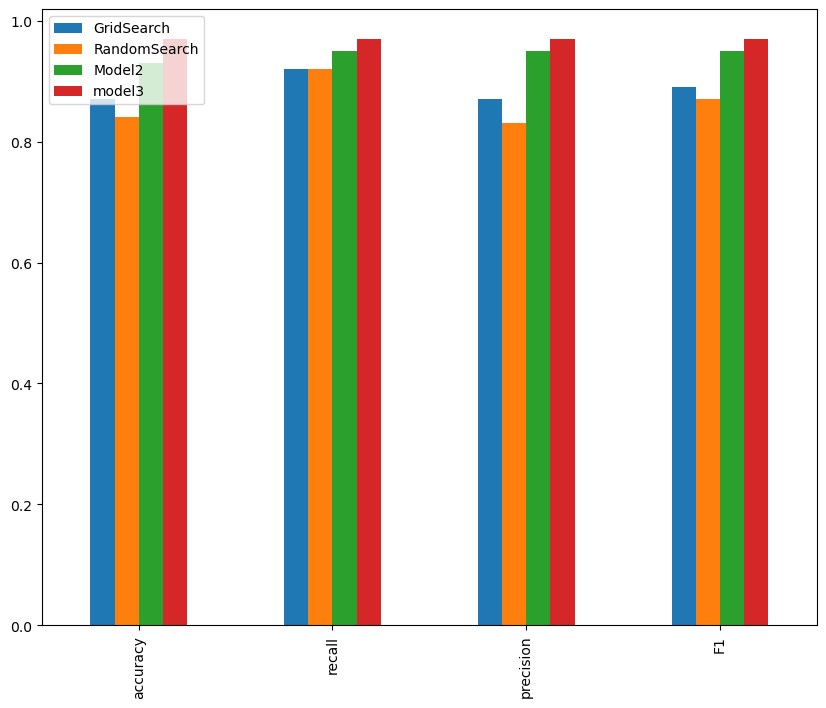

In [37]:
data = pd.DataFrame({"GridSearch":grid_res,
                   "RandomSearch":rand_res,
                    "Model2":model2_res,
                    "model3":model3_res})

data.plot.bar(figsize=(10,8))


## Why is so?

because there might me some cases where the score which is simply training on probablity or an algo might be better without any hyperparameters.


---------------------------------


In [38]:
# saving model

import pickle

pickle.dump(model2,open("../datasets/Classification_model.pkl","wb"))

In [39]:
# reuse it

file = pickle.load(open("../datasets/Classification_model.pkl","rb"))
file.score(x_test,y_test) #resued!!

0.9344262295081968